In [109]:
import psycopg2
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

conn = psycopg2.connect(database="postgres", user="postgres", password="***", host="127.0.0.1", port="5432")

In [47]:
query = "SELECT * from edges"
df = pd.read_sql_query(query, conn)
df

,fromnode,tonode,distance
0,1,2,1306.0
1,1,5,2161.0
2,1,6,2661.0
3,2,3,919.0
4,2,4,629.0
5,3,4,435.0
6,3,5,1225.0
7,3,7,1983.0
8,5,6,1483.0
9,5,7,1258.0


In [137]:
# from dataframe to graph
graph=nx.from_pandas_dataframe(df, 'fromnode', 'tonode', 'distance')
graph[1][2]

{'distance': 1306.0}

In [61]:
# from graph to dataframe as a matrix
nx.to_pandas_dataframe(graph, weight='distance')

,1.0,2.0,3.0,4.0,5.0,6.0,7.0
1.0,0.0,1306.0,0.0,0.0,2161.0,2661.0,0.0
2.0,1306.0,0.0,919.0,629.0,0.0,0.0,0.0
3.0,0.0,919.0,0.0,435.0,1225.0,0.0,1983.0
4.0,0.0,629.0,435.0,0.0,0.0,0.0,0.0
5.0,2161.0,0.0,1225.0,0.0,0.0,1483.0,1258.0
6.0,2661.0,0.0,0.0,0.0,1483.0,0.0,0.0
7.0,0.0,0.0,1983.0,0.0,1258.0,0.0,0.0


In [164]:
# print nodes and edges
print 'list nodes: ', graph.nodes(), '\n'
print 'no. nodes:', len(graph) #no. nodes
print 'no. edges:', graph.number_of_edges(), '\n'
print 'list edges: ', graph.edges(), '\n'
print 'list all edge attributes: ', dict(((a,b,),c['distance']) for a,b,c in graph.edges(data=True))


list nodes:  [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0] 

no. nodes: 7
no. edges: 10 

list edges:  [(1.0, 2.0), (1.0, 5.0), (1.0, 6.0), (2.0, 3.0), (2.0, 4.0), (3.0, 4.0), (3.0, 5.0), (3.0, 7.0), (5.0, 6.0), (5.0, 7.0)] 

list all edge attributes:  {(1.0, 2.0): 1306.0, (5.0, 6.0): 1483.0, (5.0, 7.0): 1258.0, (1.0, 5.0): 2161.0, (1.0, 6.0): 2661.0, (3.0, 7.0): 1983.0, (2.0, 3.0): 919.0, (3.0, 4.0): 435.0, (2.0, 4.0): 629.0, (3.0, 5.0): 1225.0}


In [154]:
# edge_labels=dict([((u,v,),d['distance']) for u,v,d in graph.edges(data=True)])
print edge_labels

{(1.0, 2.0): 1306.0, (5.0, 6.0): 1483.0, (5.0, 7.0): 1258.0, (1.0, 5.0): 2161.0, (1.0, 6.0): 2661.0, (3.0, 7.0): 1983.0, (2.0, 3.0): 919.0, (3.0, 4.0): 435.0, (2.0, 4.0): 629.0, (3.0, 5.0): 1225.0}


In [69]:
# shortest path
nx.shortest_path(graph, source=1, target=7, weight='distance')

[1, 5.0, 7.0]

In [73]:
# shortest path
paths = nx.all_shortest_paths(graph, source=1, target=7, weight='distance')
for path in paths:
    print path

[1, 5.0, 7]


In [72]:
# all simple paths without weight
path = nx.all_simple_paths(graph, source=1, target=7)
for i in path:
    print i

[1, 2.0, 3.0, 5.0, 7]
[1, 2.0, 3.0, 7]
[1, 2.0, 4.0, 3.0, 5.0, 7]
[1, 2.0, 4.0, 3.0, 7]
[1, 5.0, 3.0, 7]
[1, 5.0, 7]
[1, 6.0, 5.0, 3.0, 7]
[1, 6.0, 5.0, 7]


{(1.0, 2.0): 1306.0, (5.0, 6.0): 1483.0, (5.0, 7.0): 1258.0, (1.0, 5.0): 2161.0, (1.0, 6.0): 2661.0, (3.0, 7.0): 1983.0, (2.0, 3.0): 919.0, (3.0, 4.0): 435.0, (2.0, 4.0): 629.0, (3.0, 5.0): 1225.0}


{(1.0, 2.0): <matplotlib.text.Text at 0x11d09efd0>,
 (1.0, 5.0): <matplotlib.text.Text at 0x11d0bfe90>,
 (1.0, 6.0): <matplotlib.text.Text at 0x11d0cc450>,
 (2.0, 3.0): <matplotlib.text.Text at 0x11d0ccfd0>,
 (2.0, 4.0): <matplotlib.text.Text at 0x11d0dab90>,
 (3.0, 4.0): <matplotlib.text.Text at 0x11d0da5d0>,
 (3.0, 5.0): <matplotlib.text.Text at 0x11d0e6190>,
 (3.0, 7.0): <matplotlib.text.Text at 0x11d0cca10>,
 (5.0, 6.0): <matplotlib.text.Text at 0x11d0bf310>,
 (5.0, 7.0): <matplotlib.text.Text at 0x11d0bf8d0>}

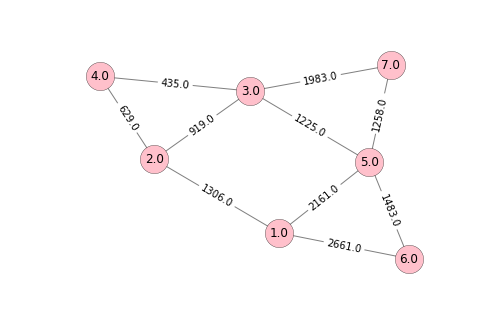

In [152]:
# choose layout
pos = nx.spring_layout(graph)

# draw network
nx.draw(graph, pos, with_labels = True, node_size=800, node_color='pink', edge_color='grey')

# label edges
edge_labels = dict([((u,v,),d['distance']) for u,v,d in graph.edges(data=True)])
print edge_labels

nx.draw_networkx_edge_labels(graph, pos, edge_labels=edge_labels)
